In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Reading csv file and opening a dataframe with pandas
Data_Prod= pd.read_csv('GDOP_DATABASE.csv', sep =';')
Data_Prod

,Fecha,Prod 1,Prod 2,Prod 3,Prod 4,Prod 5
0,2/03/2021,4,93,4508,451,191
1,1/03/2021,4,99,4513,452,175
2,28/02/2021,6,53,4514,452,195
3,27/02/2021,5,161,4516,453,175
4,26/02/2021,5,111,4522,453,194
...,...,...,...,...,...,...
1322,19/07/2017,4,114,4407,442,124
1323,18/07/2017,4,104,4337,435,111
1324,17/07/2017,7,143,4314,432,123
1325,16/07/2017,3,125,4333,434,126


In [5]:
#renaming columns and seing the summary of descriptive information of the data
Data_Prod= Data_Prod.rename(columns={'Prod 1':'Producto 1','Prod 2':'Producto 2', 'Prod 3': 'Producto 3',
                                           'Prod 4':'Producto 4', 'Prod 5': 'Producto 5'})
Data_Prod.describe()

,Producto 1,Producto 2,Producto 3,Producto 4,Producto 5
count,1327.00000,1327.000000,1327.000000,1327.000000,1327.000000
mean,4.96835,99.554635,4448.576488,444.844009,179.690279
std,2.27596,35.373762,41.201909,4.225605,17.494962
min,0.00000,-8.000000,4307.000000,430.000000,101.000000
25%,3.00000,75.000000,4416.000000,442.000000,174.000000
50%,5.00000,99.000000,4450.000000,445.000000,182.000000
75%,6.00000,122.500000,4483.000000,448.000000,189.000000
max,13.00000,205.000000,4524.000000,453.000000,299.000000


In [7]:
#searching for Interquartil range
Prod_3=Data_Prod[['Fecha','Producto 3']]
Q3P3=Prod_3["Producto 3"].quantile(0.75)
Q1P3=Prod_3["Producto 3"].quantile(0.25)
RIQ=Q3P3-Q1P3

In [60]:
#Option of removing outliers, sorting date as index
Prod_3= Prod_3[~(Prod_3['Producto 3'] <=Q1P3-1.5*RIQ)]#--------> SI QUIEREN QUITAR LOS OUTLIERS
Prod_3= Prod_3[~(Prod_3['Producto 3'] >=Q3P3+1.5*RIQ)]#--------> SI QUIEREN QUITAR LOS OUTLIERS
Prod_3.describe()
Prod_3=Prod_3.sort_index(ascending=False)
Prod_3.dtypes

Fecha         object
Producto 3     int64
dtype: object

Text(0.5, 1.0, 'Serie de Tiempos de Producto 3')

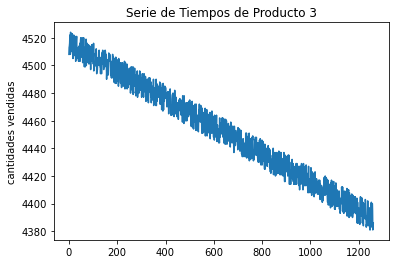

In [44]:
#creating visualization of data with a time series graph,caracterize type of data. 
serieTiempo3 =Producto_3chop.plot()
serieTiempo3.set_ylabel("cantidades vendidas")
serieTiempo3.set_title("Serie de Tiempos de Producto 3")

In [47]:
#because of data characteristics, manually removing unuseful data for forecasting, can also use head and tail method. 
Producto_3chop=Prod_3.drop([1326,1325,1323,1322,1321,1320,1319,1318,1317,1316,1315,1314,1313,1312,1311,1310,
                                         1309,1308,1307,1306,1305,1304,1302,1301,1300,1299,1298,1297,1296,1294,1293,1292
                                         ,1291,1290,1289,1288,1287,1286,1285,1284,1283,1282,1281,1280,1279,1278,1277,1276,
                                         1275,1273,1272,1271,1270,1269,1268,1267,1266,1265,1264,1263,1262,1261])
Producto_3chop

,Fecha,Producto 3
1260,19/09/2017,4386
1259,20/09/2017,4386
1258,21/09/2017,4381
1257,22/09/2017,4395
1256,23/09/2017,4400
...,...,...
4,26/02/2021,4522
3,27/02/2021,4516
2,28/02/2021,4514
1,1/03/2021,4513


<AxesSubplot:ylabel='Producto 3'>

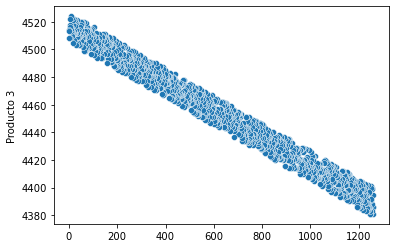

In [45]:
#Scatter plot visualization
import seaborn as sns
ScatterPlot3 = Producto_3chop
sns.scatterplot(data=ScatterPlot3)

In [76]:
#creation of Y data for linear regression
Y_data=Producto_3chop[["Producto 3"]]
Y_data

,Producto 3
1260,4386
1259,4386
1258,4381
1257,4395
1256,4400
...,...
4,4522
3,4516
2,4514
1,4513


In [51]:
#creating training data set without last ten values to forecast
Y_train=Y_data.drop([0,1,2,3,4,5,6,7,8,9])
Y_train

1260    4386
1259    4386
1258    4381
1257    4395
1256    4400
        ... 
14      4512
13      4523
12      4513
11      4510
10      4516
Name: Producto 3, Length: 1251, dtype: int64

In [71]:
#abstract column for making the fit 
Producto_3chop['X']=np.nan
for i in Producto_3chop.index:
        Producto_3chop.loc[i,'X']= abs(i-1260)

Producto_3chop

,Fecha,Producto 3,X
1260,19/09/2017,4386,0.0
1259,20/09/2017,4386,1.0
1258,21/09/2017,4381,2.0
1257,22/09/2017,4395,3.0
1256,23/09/2017,4400,4.0
...,...,...,...
4,26/02/2021,4522,1256.0
3,27/02/2021,4516,1257.0
2,28/02/2021,4514,1258.0
1,1/03/2021,4513,1259.0


In [55]:
#creating LR object
from sklearn.linear_model import LinearRegression
lre=LinearRegression()

In [78]:
#x training data set 
X_data=Producto_3chop[["X"]]
X_train=X_data.drop([0,1,2,3,4,5,6,7,8,9])
X_train

,X
1260,0.0
1259,1.0
1258,2.0
1257,3.0
1256,4.0
...,...
14,1246.0
13,1247.0
12,1248.0
11,1249.0


In [79]:
#creating the linear regression model
lre.fit(X_train, Y_train)

LinearRegression()

In [80]:
#Rsquared of data relationship
lre.score(X_train, Y_train)

0.9735691658758949

In [101]:
#obtaining LR Parameters
lre.coef_

array([0.10029862])

In [85]:
lre.intercept_

4389.681864731857

In [95]:
#Saving predictions made
yhat_train = lre.predict(X_train)
yhat_train

array([4389.68186473, 4389.78216336, 4389.88246198, ..., 4514.85454841,
       4514.95484704, 4515.05514566])

C:\Users\Fabrizio\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Fabrizio\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


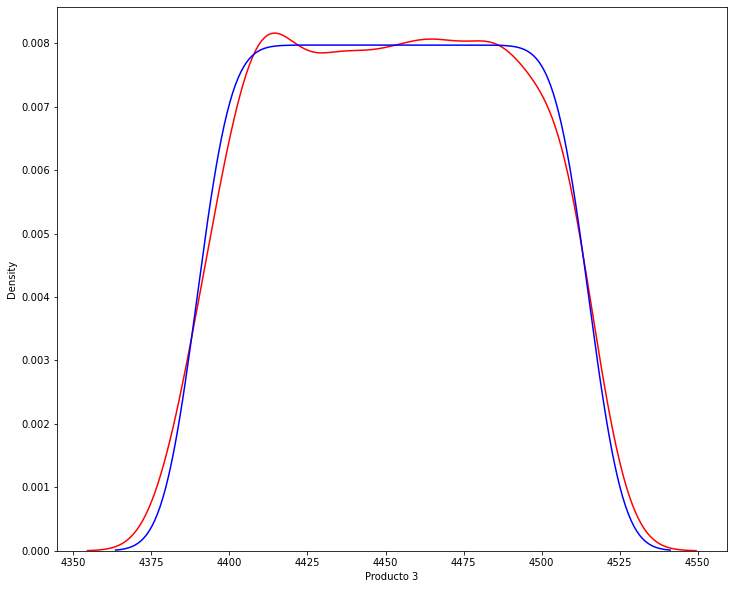

In [92]:
#Distribution plot for visualizing actual data vs predicitons
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)
Title = 'Predicción vs Valor Real'
DistributionPlot(Y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

In [99]:
#saving predictions on dataframe
Predictions_Prod3=pd.DataFrame(yhat_train, columns=['Predicciones']) 
Predictions_Prod3=Predictions_Prod3

,Predicciones
0,4389.681865
1,4389.782163
2,4389.882462
3,4389.982761
4,4390.083059
...,...
1246,4514.653951
1247,4514.754250
1248,4514.854548
1249,4514.954847


In [103]:

for i in range(1251,1261):
    Predictions_Prod3.loc[i,"Predicciones"]=lre.coef_*i+lre.intercept_
    if i == 1261:
        break

In [104]:
Predictions_Prod3.tail(10)

,Predicciones
1251,4515.155444
1252,4515.255743
1253,4515.356042
1254,4515.456340
1255,4515.556639
1256,4515.656937
1257,4515.757236
1258,4515.857535
1259,4515.957833
1260,4516.058132


In [ ]:
#Repeating process with test data (now with last 10 results)

In [105]:
lre.fit(X_data, Y_data)

LinearRegression()

In [106]:
lre.score(X_data, Y_data)

0.9740213407109317

In [107]:
lre.coef_

array([[0.10027936]])

In [108]:
lre.intercept_

array([4389.68998141])

In [109]:
yhat_data = lre.predict(X_data)
yhat_data

array([[4389.68998141],
       [4389.79026077],
       [4389.89054014],
       ...,
       [4515.84141863],
       [4515.94169799],
       [4516.04197735]])

C:\Users\Fabrizio\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Fabrizio\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


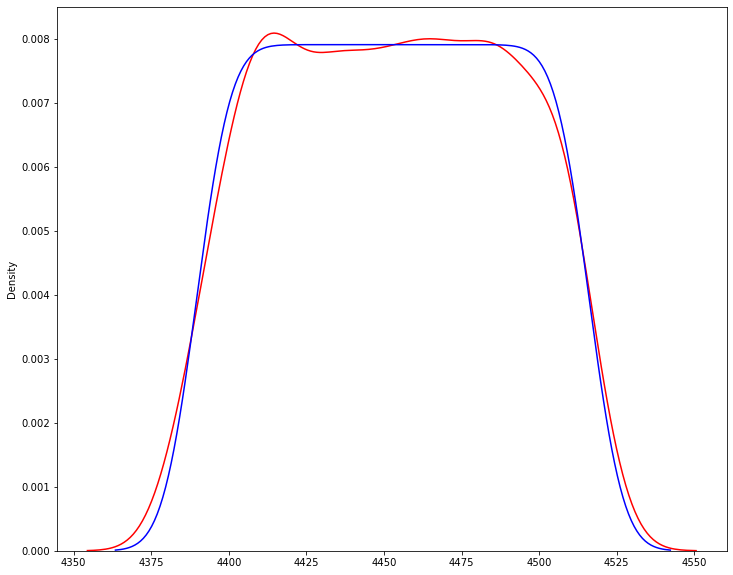

In [110]:
#prediciton vs real value
Title = 'Predicción vs Valor Real'
DistributionPlot(Y_data, yhat_data, "Actual Values (Producto 3)", "Predicted Values (Producto 3)", Title)

In [111]:
Predictions_Prod3_data=pd.DataFrame(yhat_data, columns=['Predicciones']) 
Predictions_Prod3_data

,Predicciones
0,4389.689981
1,4389.790261
2,4389.890540
3,4389.990819
4,4390.091099
...,...
1256,4515.640860
1257,4515.741139
1258,4515.841419
1259,4515.941698


In [112]:
for i in range(1261,1271):
    Predictions_Prod3_data.loc[i,"Predicciones"]=lre.coef_*i+lre.intercept_
    if i == 1271:
        break

In [114]:
Predicciones=Predictions_Prod3_data.tail(10)
Predicciones

,Predicciones
1261,4516.142257
1262,4516.242536
1263,4516.342815
1264,4516.443095
1265,4516.543374
1266,4516.643654
1267,4516.743933
1268,4516.844212
1269,4516.944492
1270,4517.044771


In [115]:
#arranging the dataframe for excel saving
Predicciones.to_excel("Forecasts_Prod3.xlsx") 

In [129]:
Predictions_Prod3_data['index']=np.nan
for i in Predictions_Prod3_data.index:
    Predictions_Prod3_data.loc[i,'index']=abs(1260-i)
Predictions_Prod3_data=Predictions_Prod3_data.head(1261)
Predictions_Prod3_data.set_index('index')

,Predicciones
index,
1260.0,4389.689981
1259.0,4389.790261
1258.0,4389.890540
1257.0,4389.990819
1256.0,4390.091099
...,...
4.0,4515.640860
3.0,4515.741139
2.0,4515.841419


#Dataframe creation with date, product real value (demand), prediction, and mean absolute percentual error
Excel_Producto3=Producto_3chop[["Fecha","Producto 3"]]
Excel_Producto3['Predicciones']=np.nan
for i in Excel_Producto3.index:
    Excel_Producto3.loc[i,'Predicciones']=Predictions_Prod3_data.set_index('index').loc[i,'Predicciones']
Excel_Producto3['Mape']=np.nan
for i in Excel_Producto3.index:
    if Excel_Producto3.loc[i,'Producto 3']!=0:
        Excel_Producto3.loc[i,'Mape']=abs(Excel_Producto3.loc[i,'Producto 3'] - Excel_Producto3.loc[i,'Predicciones'])/Excel_Producto3.loc[i,'Producto 3']
    else:
        Excel_Producto3.loc[i,'Mape'] = None
Excel_Producto3

In [133]:
Excel_Producto3.to_excel("Resultado_Prod3.xlsx") 